In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")

In [3]:
reg = data.copy()
reg = reg.iloc[:,4:10]

In [4]:
correlation_matrix = reg.corr()

C:\Users\lg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


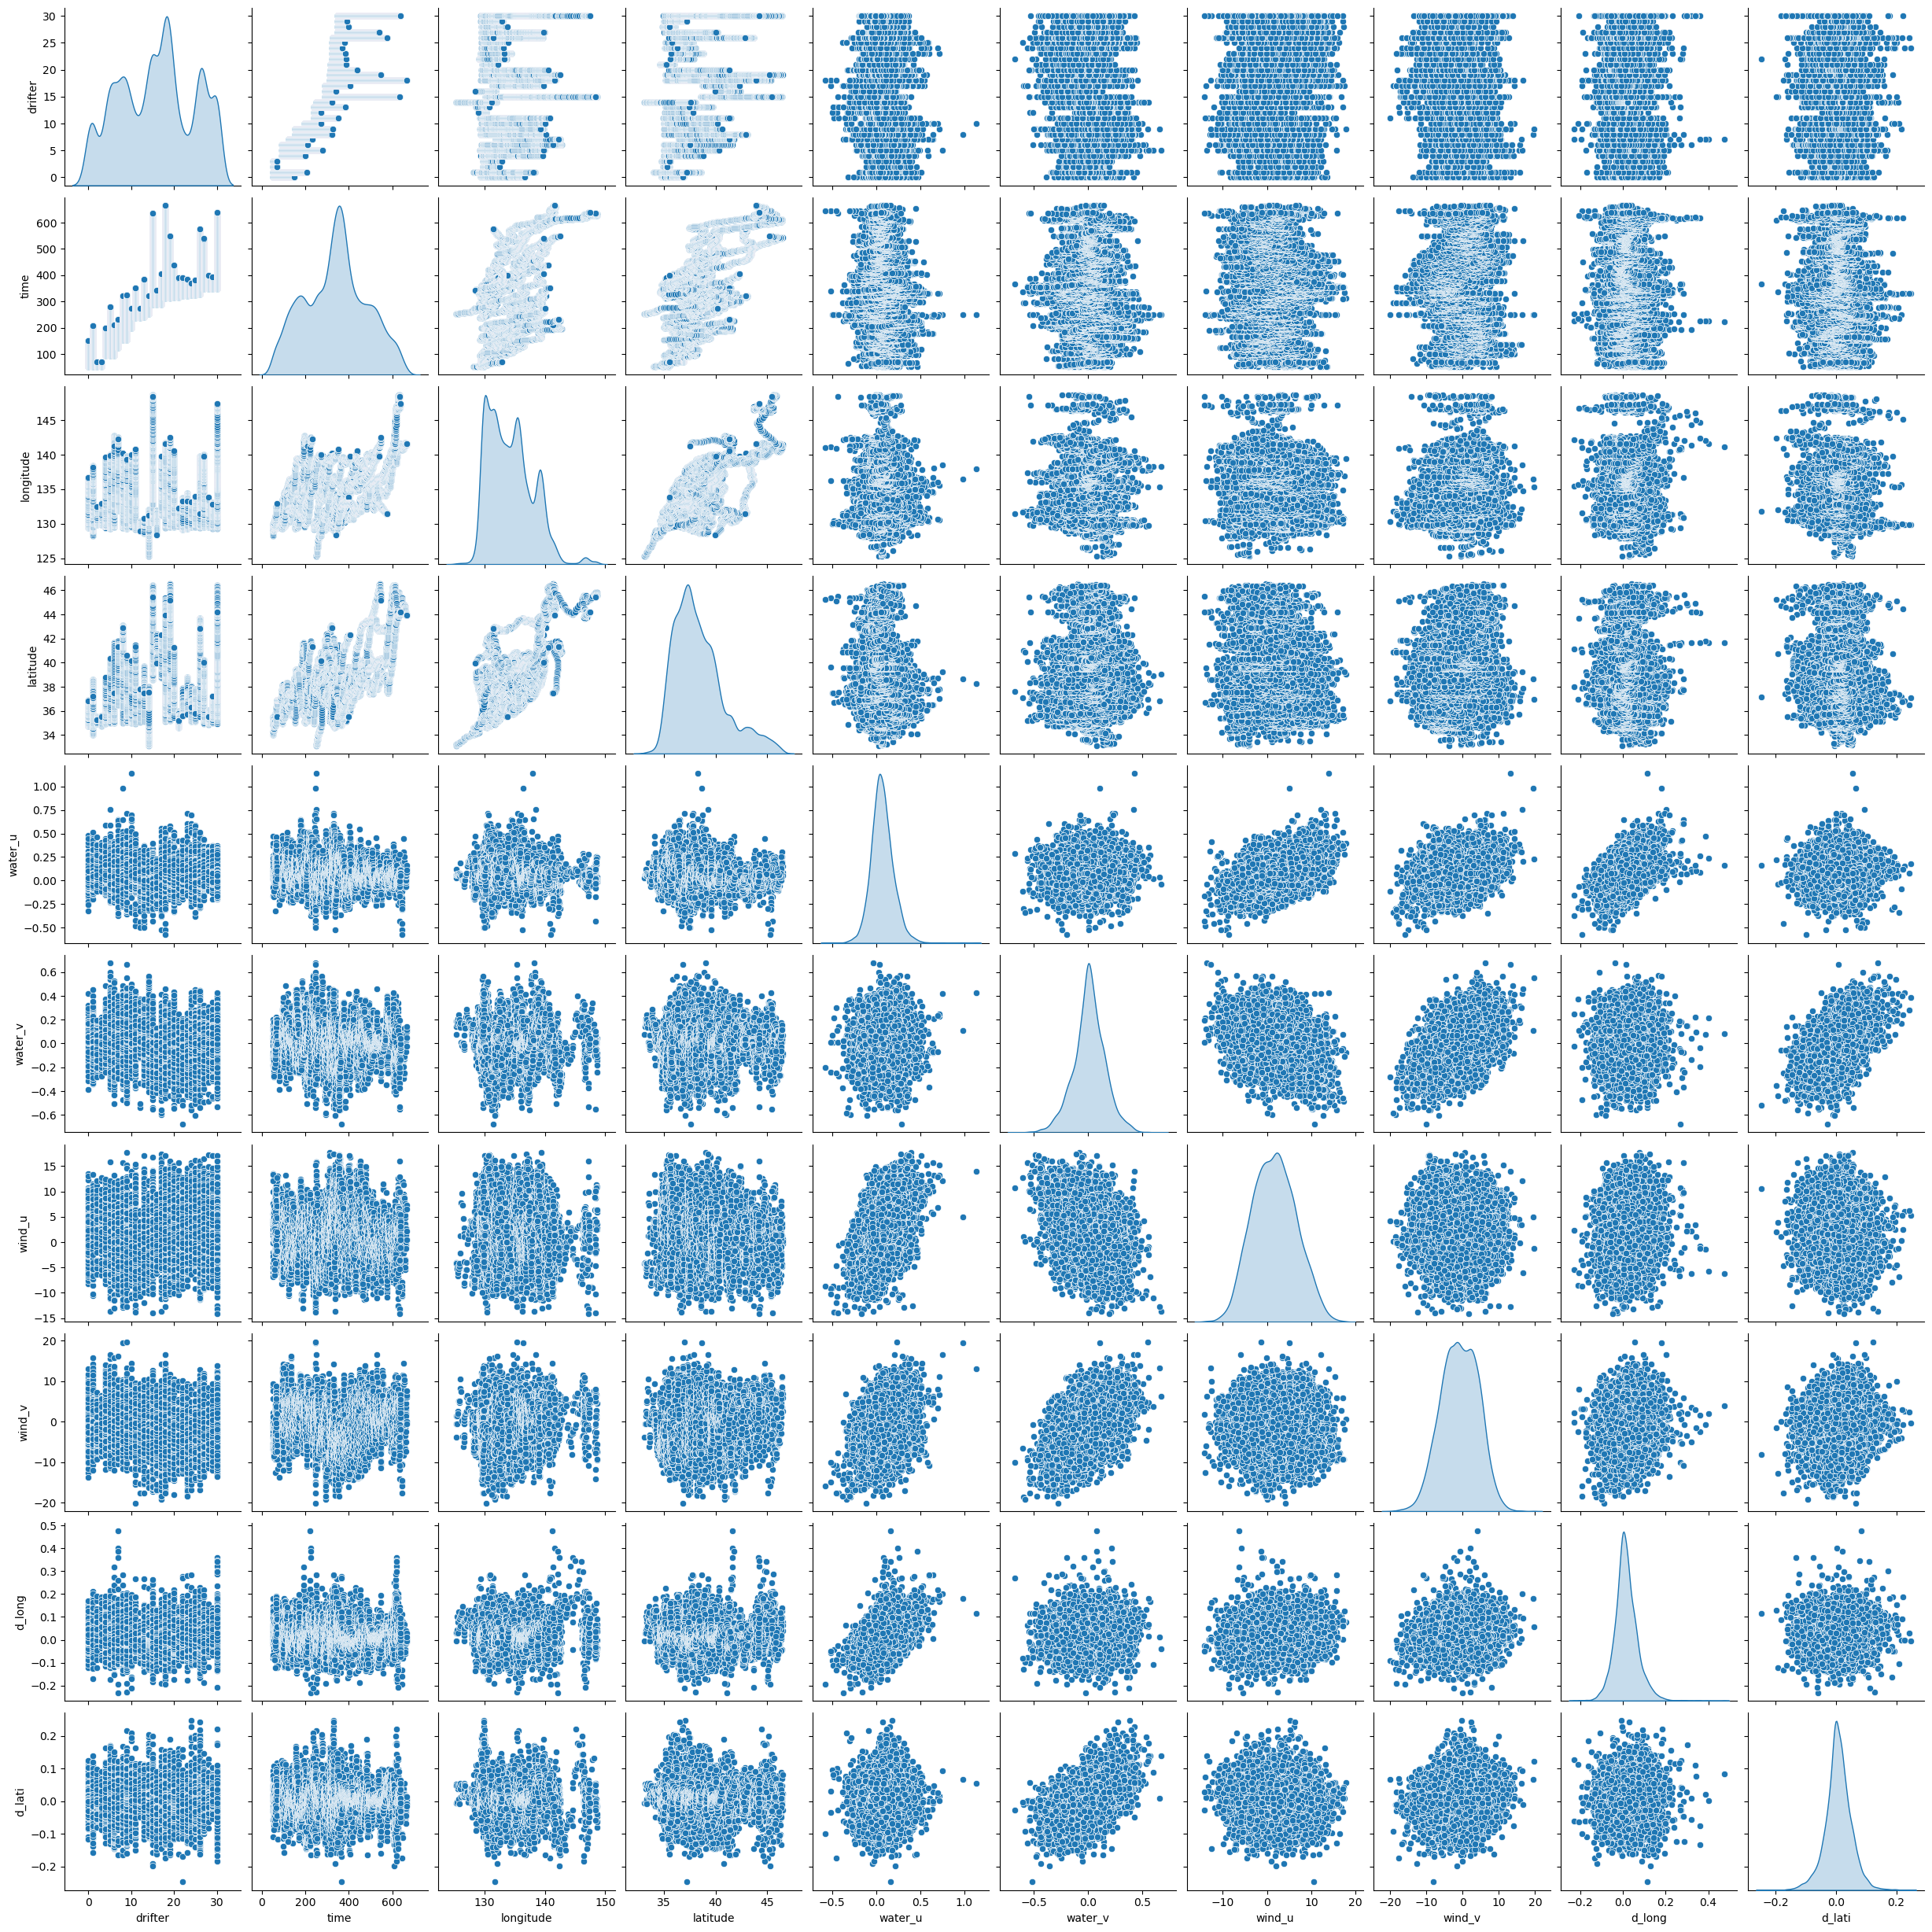

In [5]:
# pair plot
sns.pairplot(data, diag_kind='kde')
plt.show()

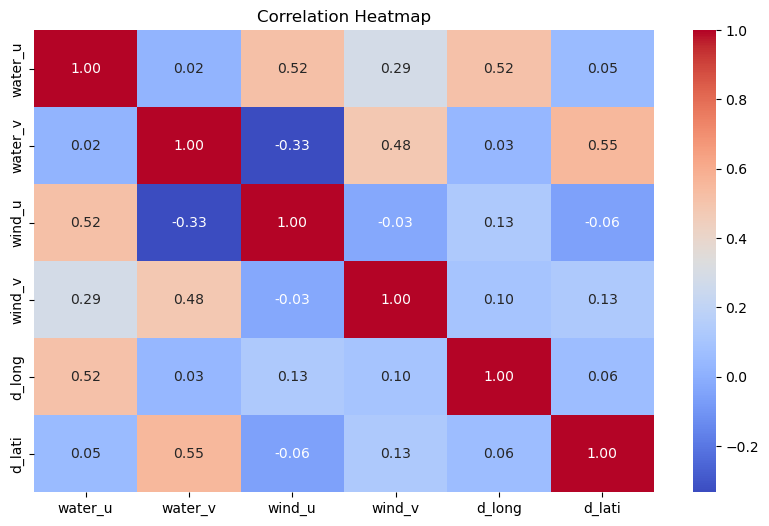

In [6]:
# heat map
plt.figure(figsize=(10, 6))  # 그림의 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# d_long, d_lati

In [7]:
features = ['water_u', 'water_v', 'wind_u', 'wind_v']
target_d_long = 'd_long'
target_d_lati = 'd_lati'

X_train, X_test, y_train_long, y_test_long, y_train_lati, y_test_lati = train_test_split(
    reg[features], reg[target_d_long], reg[target_d_lati], test_size=0.2, random_state=42)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(len(features),)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)  # 2 output neurons for d_long and d_lati
])

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2466 (9.63 KB)
Trainable params: 2466 (9.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.fit(X_train, y_train_long, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
317/317 - 1s - loss: 0.0105 - val_loss: 0.0025 - 705ms/epoch - 2ms/step
Epoch 2/50
317/317 - 0s - loss: 0.0026 - val_loss: 0.0023 - 283ms/epoch - 893us/step
Epoch 3/50
317/317 - 0s - loss: 0.0026 - val_loss: 0.0023 - 316ms/epoch - 997us/step
Epoch 4/50
317/317 - 0s - loss: 0.0026 - val_loss: 0.0027 - 333ms/epoch - 1ms/step
Epoch 5/50
317/317 - 0s - loss: 0.0025 - val_loss: 0.0028 - 298ms/epoch - 941us/step
Epoch 6/50
317/317 - 0s - loss: 0.0025 - val_loss: 0.0026 - 306ms/epoch - 967us/step
Epoch 7/50
317/317 - 0s - loss: 0.0026 - val_loss: 0.0022 - 342ms/epoch - 1ms/step
Epoch 8/50
317/317 - 0s - loss: 0.0025 - val_loss: 0.0021 - 317ms/epoch - 1ms/step
Epoch 9/50
317/317 - 0s - loss: 0.0025 - val_loss: 0.0021 - 314ms/epoch - 989us/step
Epoch 10/50
317/317 - 0s - loss: 0.0024 - val_loss: 0.0025 - 318ms/epoch - 1ms/step
Epoch 11/50
317/317 - 0s - loss: 0.0024 - val_loss: 0.0025 - 298ms/epoch - 941us/step
Epoch 12/50
317/317 - 0s - loss: 0.0025 - val_loss: 0.0023 - 307ms/epoch 

# RMSE

In [11]:
predictions = model.predict(X_test)

y_pred_long = predictions[:, 0]
y_pred_lati = predictions[:, 1]

99/99 [==============================] - 0s 699us/step


In [12]:
mse_long = mean_squared_error(y_test_long, y_pred_long)
mse_lati = mean_squared_error(y_test_lati, y_pred_lati)

In [13]:
rmse_long = np.sqrt(mse_long)
rmse_lati = np.sqrt(mse_lati)

print(f"RMSE for d_long: {rmse_long}")
print(f"RMSE for d_lati: {rmse_lati}")

RMSE for d_long: 0.04436605356280036
RMSE for d_lati: 0.0519368636394541
